In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch
import torchvision 
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img =img.cpu()
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [ ]:
def weights_initialization(model):
  for m in model.modules():
    if isinstance(m,(nn.Conv2d, nn.ConvTranspose2d,nn.BatchNorm2d)):
      nn.init.normal_(m.weight.data,0.0,0.02)


In [ ]:
class Discriminator(nn.Module):
  def __init__(self, channels_img, features_d):
    super(Discriminator,self).__init__()
    self.disc  = nn.Sequential(
        nn.Conv2d(
            channels_img, features_d, kernel_size=4, stride=2,padding=1
        ),
        nn.LeakyReLU(0.2),
        self.block(features_d  , features_d*2   , 4, 2, 1),
        self.block(features_d*2, features_d*4 , 4, 2, 1),
        self.block(features_d*4, features_d*8 , 4, 2, 1),
        
        nn.Conv2d(features_d * 8, 1, kernel_size=4, stride=2, padding=0),
        nn.Sigmoid()
    )

  def block(self,in_channels, out_channels,kernel_size,stride, padding):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels,kernel_size,stride, padding,
                  bias=False),
        nn.BatchNorm2d(out_channels),
        nn.LeakyReLU(0.2)
    )

  def forward(self, x):
    return self.disc(x)


In [ ]:
x = torch.rand((5,1,64,64))
disc = Discriminator(1,64)
y = disc(x)
print(y.shape)

torch.Size([5, 1, 1, 1])


In [ ]:
class Generator(nn.Module):
    def __init__(self, channels_noise, channels_img, features_g):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            # Input: N x channels_noise x 1 x 1

            self.block(channels_noise, features_g * 16, 4, 1, 0),  # img: 4x4
            self.block(features_g * 16, features_g * 8, 4, 2, 1),  # img: 8x8
            self.block(features_g * 8, features_g * 4, 4, 2, 1),  # img: 16x16
            self.block(features_g * 4, features_g * 2, 4, 2, 1),  # img: 32x32
            nn.ConvTranspose2d(
                features_g * 2, channels_img, kernel_size=4, stride=2, padding=1
            ),
            # Output: N x channels_img x 64 x 64
            nn.Tanh(),
        )

    def block(self, in_channels, out_channels, kernel_size, stride, padding):
        return nn.Sequential(
            nn.ConvTranspose2d(
                in_channels,
                out_channels,
                kernel_size,
                stride,
                padding,
                bias=False,
            ),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
        )

    def forward(self, x):
        return self.net(x)


In [ ]:
x = torch.rand((5,100,1,1))
gen = Generator(100,1,64)
y = gen(x)
print(y.shape)

torch.Size([5, 1, 64, 64])


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision


LEARNING_RATE = 2e-4  # could also use two lrs, one for gen and one for disc
BATCH_SIZE = 128
IMAGE_SIZE = 64
CHANNELS_IMG = 1
NOISE_DIM = 100
NUM_EPOCHS = 5
FEATURES_DISC = 64
FEATURES_GEN = 64



transform = transforms.Compose([transforms.Resize(IMAGE_SIZE),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

dataset = datasets.MNIST(root='./data', download=True,
                               transform= transform)

dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)


In [ ]:

gen = Generator(NOISE_DIM,CHANNELS_IMG,FEATURES_GEN).to(device)
disc = Discriminator(CHANNELS_IMG, FEATURES_DISC).to(device)

weights_initialization(gen)
weights_initialization(disc)



Epoch [0/50] Batch 468/469                       Loss D: 0.1768, loss G: 2.2552


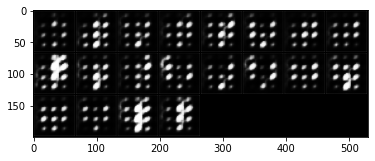

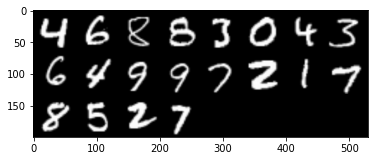

Epoch [1/50] Batch 468/469                       Loss D: 0.0410, loss G: 5.1686


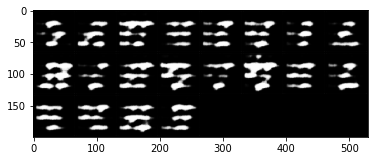

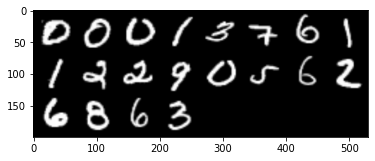

Epoch [2/50] Batch 468/469                       Loss D: 0.0735, loss G: 3.7326


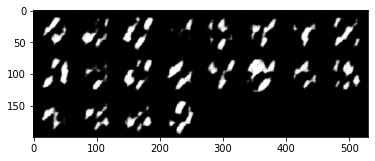

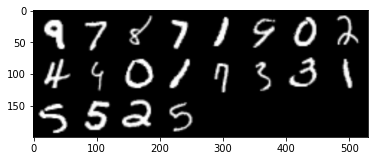

Epoch [3/50] Batch 468/469                       Loss D: 0.0441, loss G: 3.9769


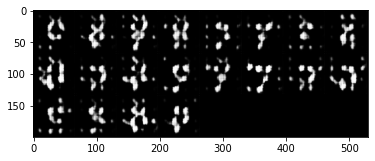

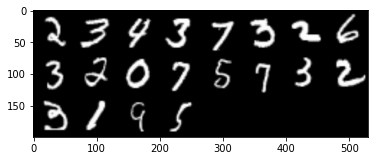

Epoch [4/50] Batch 468/469                       Loss D: 0.1202, loss G: 3.7806


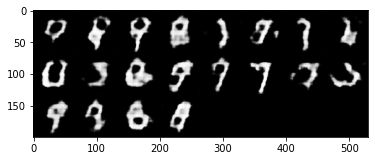

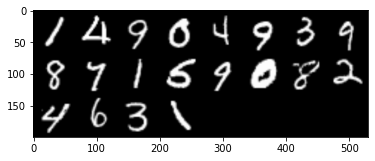

Epoch [5/50] Batch 468/469                       Loss D: 0.2637, loss G: 3.0591


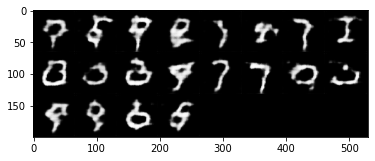

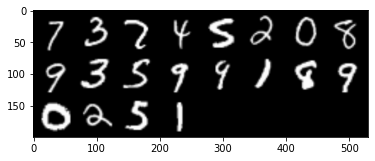

Epoch [6/50] Batch 468/469                       Loss D: 0.1256, loss G: 3.5944


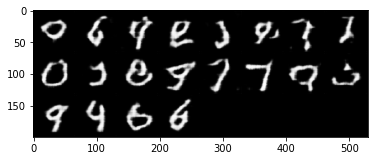

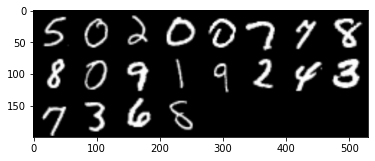

Epoch [7/50] Batch 468/469                       Loss D: 0.5468, loss G: 2.3470


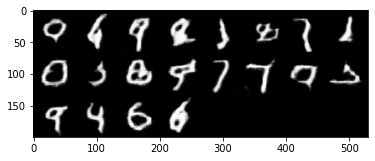

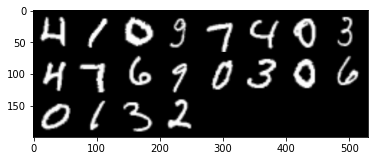

Epoch [8/50] Batch 468/469                       Loss D: 0.6066, loss G: 3.2872


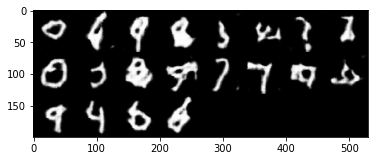

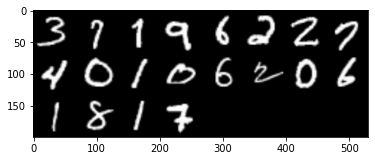

Epoch [9/50] Batch 468/469                       Loss D: 0.2064, loss G: 3.2196


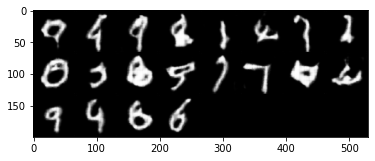

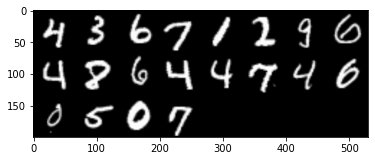

Epoch [10/50] Batch 468/469                       Loss D: 0.3151, loss G: 2.3872


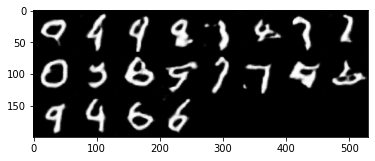

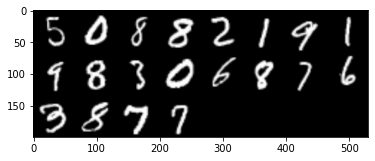

Epoch [11/50] Batch 468/469                       Loss D: 0.1676, loss G: 4.9129


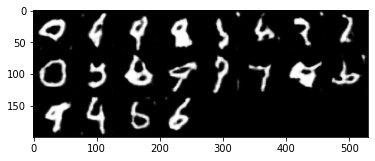

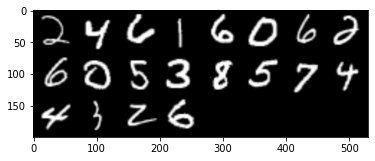

Epoch [12/50] Batch 468/469                       Loss D: 0.3221, loss G: 1.8782


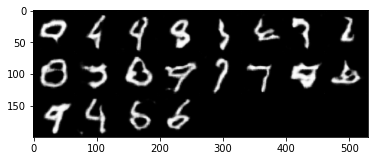

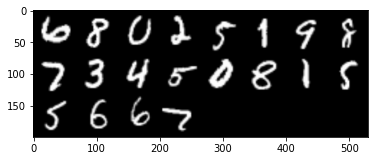

Epoch [13/50] Batch 468/469                       Loss D: 0.1190, loss G: 6.1257


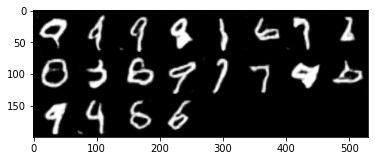

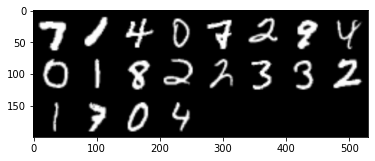

Epoch [14/50] Batch 468/469                       Loss D: 0.3785, loss G: 7.7994


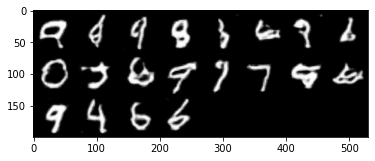

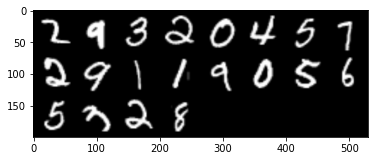

Epoch [15/50] Batch 468/469                       Loss D: 0.0362, loss G: 5.2806


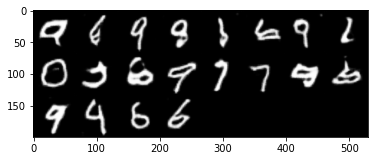

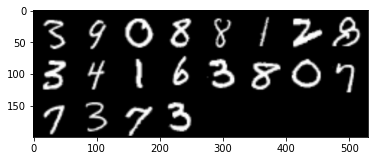

Epoch [16/50] Batch 468/469                       Loss D: 0.0882, loss G: 3.3953


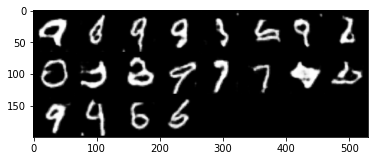

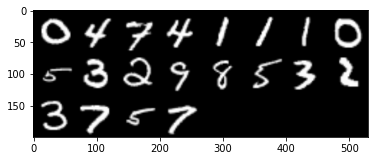

Epoch [17/50] Batch 468/469                       Loss D: 0.0607, loss G: 3.9432


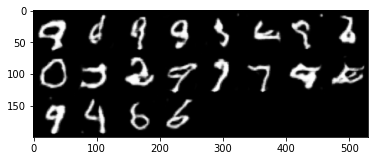

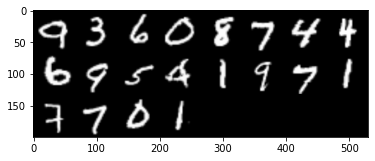

Epoch [18/50] Batch 468/469                       Loss D: 0.0396, loss G: 3.6012


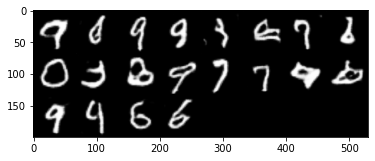

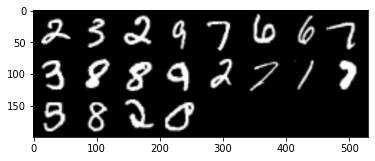

Epoch [19/50] Batch 468/469                       Loss D: 0.0548, loss G: 2.9039


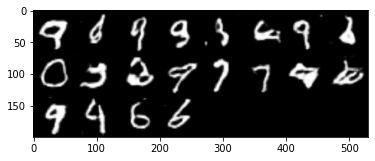

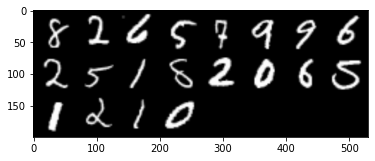

Epoch [20/50] Batch 468/469                       Loss D: 0.0918, loss G: 1.1465


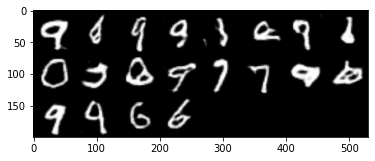

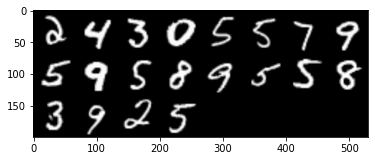

Epoch [21/50] Batch 468/469                       Loss D: 0.0449, loss G: 4.7469


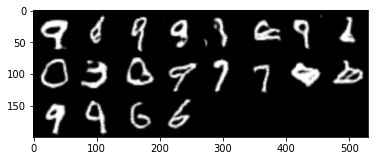

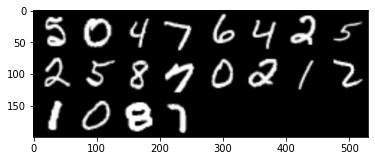

Epoch [22/50] Batch 468/469                       Loss D: 0.0792, loss G: 5.5870


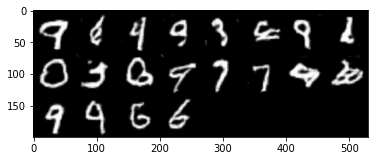

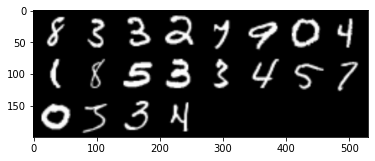

Epoch [23/50] Batch 468/469                       Loss D: 0.0215, loss G: 6.7730


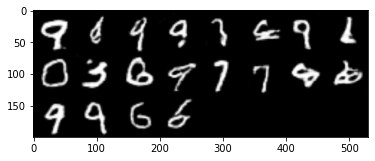

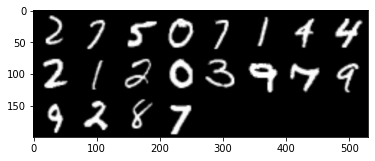

Epoch [24/50] Batch 468/469                       Loss D: 0.0248, loss G: 5.1582


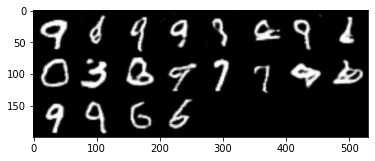

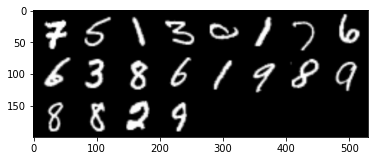

Epoch [25/50] Batch 468/469                       Loss D: 0.0265, loss G: 0.0819


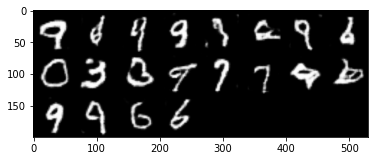

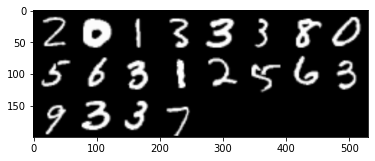

Epoch [26/50] Batch 468/469                       Loss D: 0.0374, loss G: 5.0397


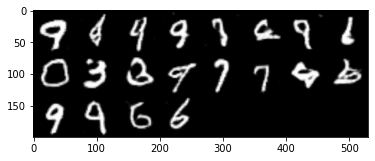

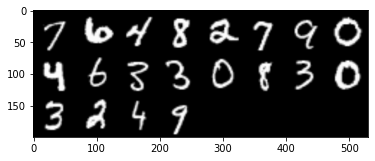

Epoch [27/50] Batch 468/469                       Loss D: 0.0161, loss G: 9.3813


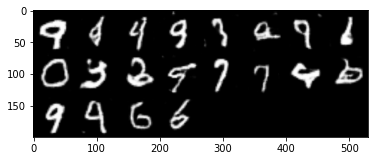

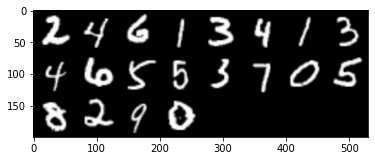

Epoch [28/50] Batch 468/469                       Loss D: 0.0534, loss G: 3.9037


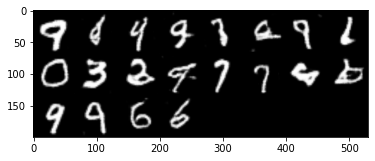

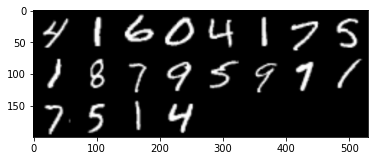

Epoch [29/50] Batch 468/469                       Loss D: 0.0619, loss G: 5.8553


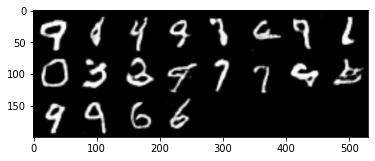

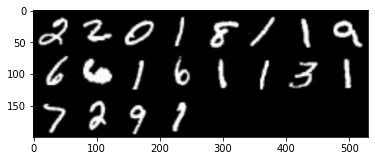

Epoch [30/50] Batch 468/469                       Loss D: 0.0150, loss G: 4.9194


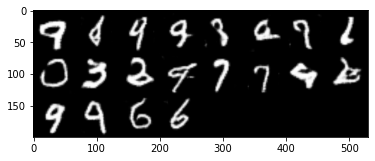

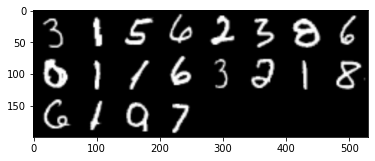

Epoch [31/50] Batch 468/469                       Loss D: 0.0541, loss G: 4.5141


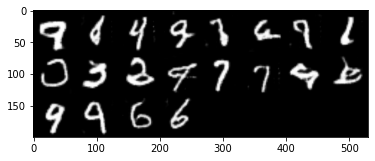

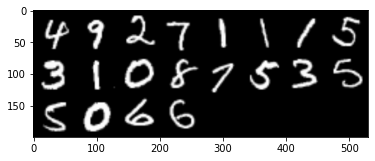

Epoch [32/50] Batch 468/469                       Loss D: 0.0755, loss G: 3.9325


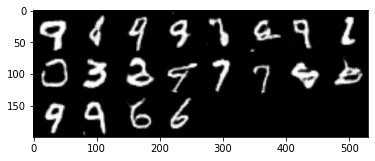

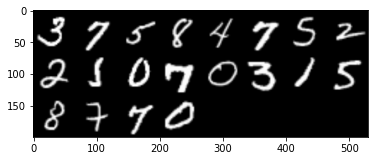

Epoch [33/50] Batch 468/469                       Loss D: 0.0176, loss G: 4.0794


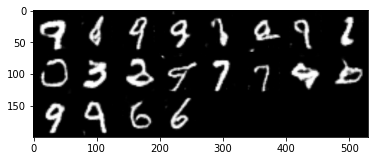

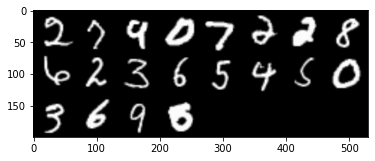

Epoch [34/50] Batch 468/469                       Loss D: 0.0273, loss G: 6.7858


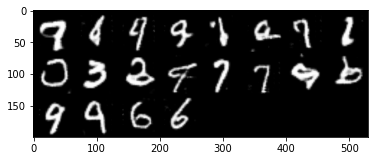

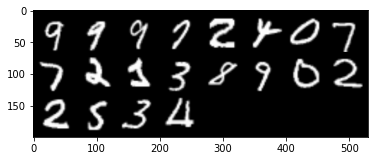

Epoch [35/50] Batch 468/469                       Loss D: 0.0484, loss G: 6.1276


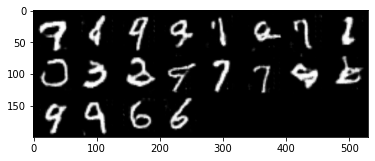

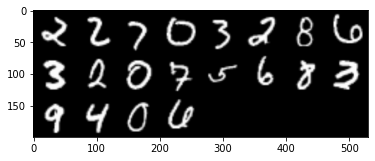

Epoch [36/50] Batch 468/469                       Loss D: 0.0149, loss G: 5.2373


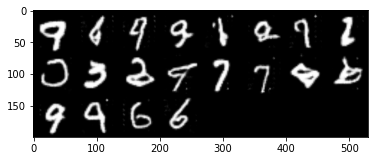

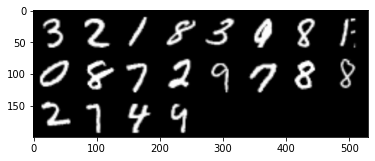

Epoch [37/50] Batch 468/469                       Loss D: 0.0183, loss G: 5.0226


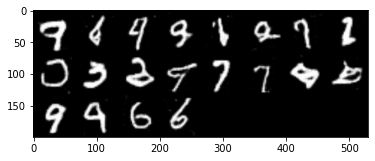

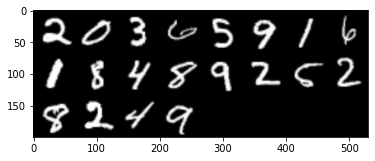

Epoch [38/50] Batch 468/469                       Loss D: 0.2401, loss G: 2.8163


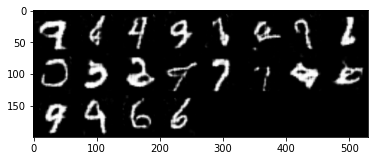

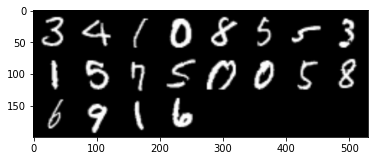

Epoch [39/50] Batch 468/469                       Loss D: 0.0636, loss G: 3.7744


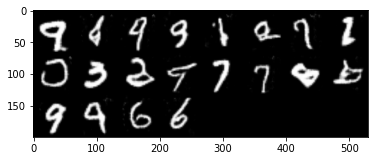

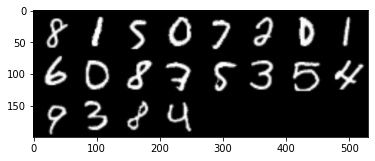

Epoch [40/50] Batch 468/469                       Loss D: 0.0284, loss G: 9.9943


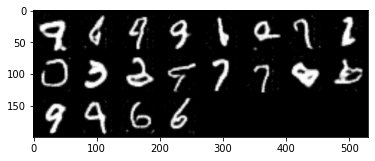

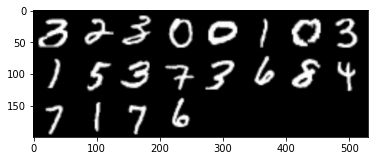

Epoch [41/50] Batch 468/469                       Loss D: 0.0577, loss G: 5.5281


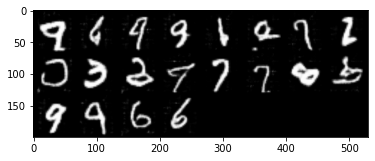

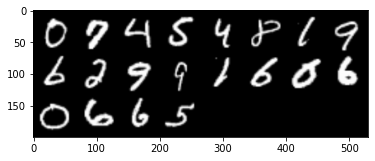

Epoch [42/50] Batch 468/469                       Loss D: 0.0117, loss G: 5.4761


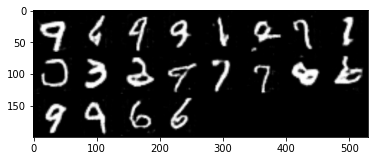

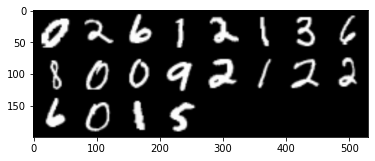

Epoch [43/50] Batch 468/469                       Loss D: 0.0053, loss G: 5.9551


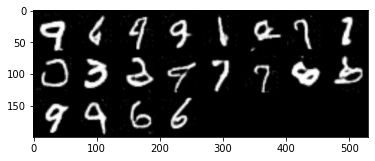

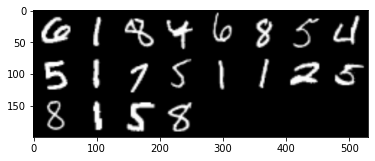

Epoch [44/50] Batch 468/469                       Loss D: 0.1056, loss G: 5.2893


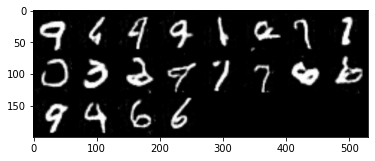

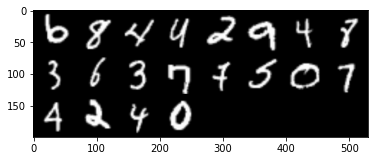

Epoch [45/50] Batch 468/469                       Loss D: 1.1992, loss G: 3.6081


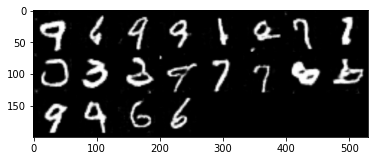

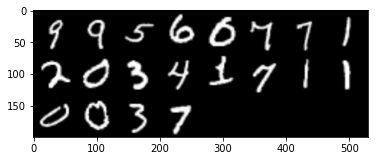

Epoch [46/50] Batch 468/469                       Loss D: 0.0340, loss G: 5.1740


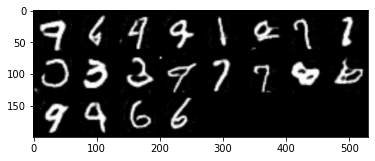

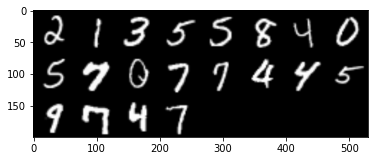

Epoch [47/50] Batch 468/469                       Loss D: 0.0068, loss G: 6.2601


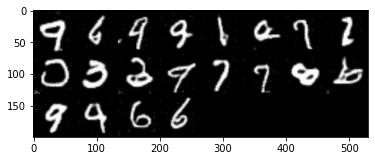

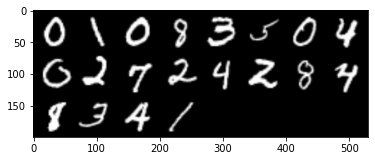

Epoch [48/50] Batch 468/469                       Loss D: 0.0236, loss G: 4.8960


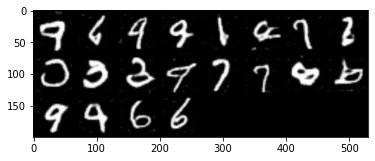

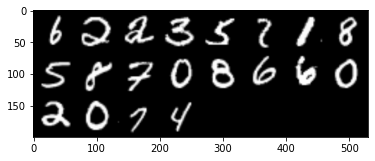

Epoch [49/50] Batch 468/469                       Loss D: 0.3460, loss G: 1.9745


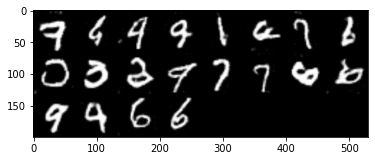

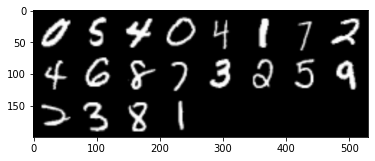

In [ ]:
fixed_noise = torch.randn((32,NOISE_DIM,1,1)).to(device)


opt_gen = torch.optim.Adam(gen.parameters(),lr=LEARNING_RATE)
opt_disc = torch.optim.Adam(disc.parameters(),lr=LEARNING_RATE)
criterion = nn.BCELoss()



num_epochs = 50
gen.train()
disc.train()

for epoch in range(num_epochs):

  for batch_idx, (real,_) in enumerate(dataloader):

      real = real.to(device)
      noise = torch.randn(128, 100, 1, 1).to(device)
      fake = gen(noise)

      ### Train Discriminator: max log(D(x)) + log(1 - D(G(z)))
    
      disc_real = disc(real).reshape(-1)
      loss_disc_real = criterion(disc_real, torch.ones_like(disc_real))
      
      disc_fake = disc(fake.detach()).reshape(-1)
      
      loss_disc_fake = criterion(disc_fake, torch.zeros_like(disc_fake))

      loss_disc = (loss_disc_real + loss_disc_fake) / 2
      
      disc.zero_grad()
      loss_disc.backward()
      opt_disc.step()

      ### Train Generator: min log(1 - D(G(z))) <-> max log(D(G(z))
      output = disc(fake).reshape(-1)
      loss_gen = criterion(output, torch.ones_like(output))
      gen.zero_grad()
      loss_gen.backward()
      opt_gen.step()

    
      
  print(f"Epoch [{epoch}/{num_epochs}] Batch {batch_idx}/{len(dataloader)} \
                      Loss D: {loss_disc:.4f}, loss G: {loss_gen:.4f}")

  with torch.no_grad():
    fake = gen(fixed_noise).reshape(-1,1,64,64)
    img_grid_fake = torchvision.utils.make_grid(fake[:20], normalize=True)   
    img_grid_real = torchvision.utils.make_grid(real[:20], normalize=True)
    imshow(img_grid_fake)
    imshow(img_grid_real)
